In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob

In [193]:
# Source: https://catalog.data.gov/dataset/electric-vehicle-population-data
data=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [194]:
print(data.columns, len(data))

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object') 76767


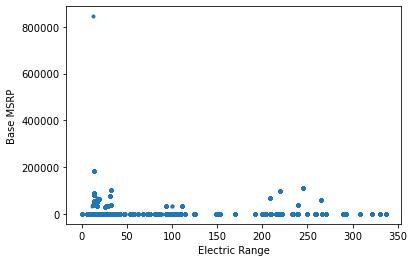

In [195]:
plt.plot(data['Electric Range'],data['Base MSRP'],'.')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

In [196]:
data=data[data['Base MSRP']<150000]
data=data[data['Base MSRP']>0]

# Key Variables:
For location independent studies:
1. Model Year
2. Make
3. Model
4. Clean Alternative Fuel Vehicle (CAFV) Eligibility
5. Electric Range
6. Base MSRP

In [197]:
df=data[['Model Year','Make', 'Electric Vehicle Type',\
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',\
       'Base MSRP']]
df=df.dropna()

In [198]:
df.head()

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
12,2014,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900
28,2013,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900
32,2019,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,28500
36,2016,HYUNDAI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600
39,2013,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900


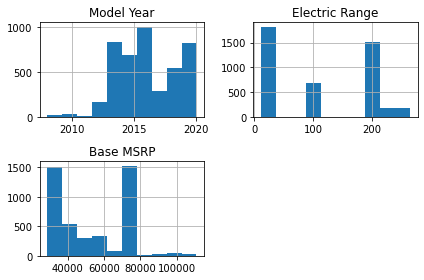

In [199]:
df.hist()
plt.tight_layout()
plt.show()

In [200]:
print(df.groupby('Make').size(),'\n')
print(df.groupby('Electric Vehicle Type').size(),'\n')
print(df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').size(),'\n')

Make
BMW                      423
CADILLAC                  13
CHRYSLER                 117
FISKER                    12
HYUNDAI                  528
KIA                     1099
MINI                     137
PORSCHE                   18
SUBARU                    43
TESLA                   1735
TOYOTA                     1
VOLVO                    281
WHEEGO ELECTRIC CARS       2
dtype: int64 

Electric Vehicle Type
Battery Electric Vehicle (BEV)            2596
Plug-in Hybrid Electric Vehicle (PHEV)    1813
dtype: int64 

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    2738
Not eligible due to low battery range      1671
dtype: int64 



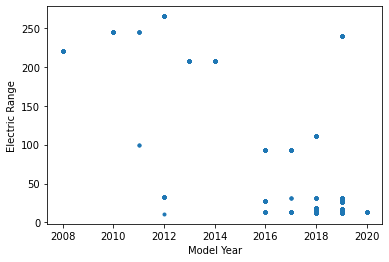

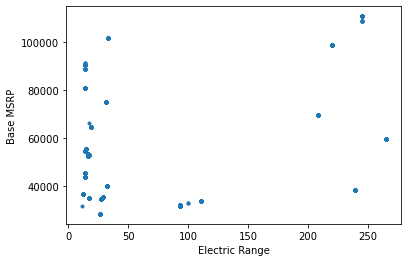

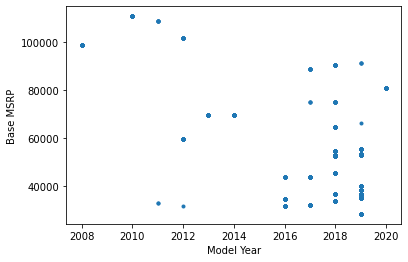

In [201]:
# Comparison plots of numerical variables:
plt.plot(df['Model Year'],df['Electric Range'],'.')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()
plt.plot(df['Electric Range'],df['Base MSRP'],'.')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()
plt.plot(df['Model Year'],df['Base MSRP'],'.')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.show()

# Question to consider:
What are the actual factors which influence the price of an EV?

In [202]:
cat_cols=['Make','Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in cat_cols:
    col_data = pd.get_dummies(df[col], prefix = col)
    df = df.join(col_data)

In [203]:
data_ml=df.drop(columns=cat_cols)
data_ml=data_ml[list(data_ml.columns[:2])+list(data_ml.columns[3:])+['Base MSRP']]

In [204]:
X,y=np.array(data_ml.iloc[:,:-1]),np.array(data_ml.iloc[:,-1])

# Modeling

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [206]:
#Source: https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
X_lr=X.reshape(-1,1)
y_lr=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8961292459207265


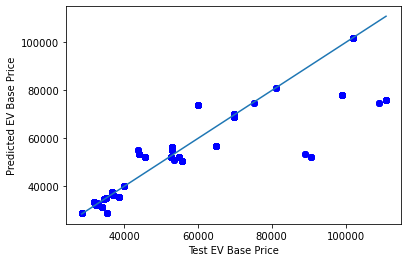

In [207]:
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred,color ='b')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.xlabel('Test EV Base Price')
plt.ylabel('Predicted EV Base Price')
plt.show()

In [208]:
cofs=regr.coef_+[regr.intercept_]
m=data_ml.columns[:-1]+['Intercept']
for i,x in enumerate(m):
    print(f'{x}:{cofs[i]:1.3f}')

Model YearIntercept:2951043.534
Electric RangeIntercept:2952527.821
Make_BMWIntercept:2959750.752
Make_CADILLACIntercept:2963716.773
Make_CHRYSLERIntercept:2930448.454
Make_FISKERIntercept:2982318.814
Make_HYUNDAIIntercept:2938757.064
Make_KIAIntercept:2937270.705
Make_MINIIntercept:2945449.020
Make_PORSCHEIntercept:2991577.272
Make_SUBARUIntercept:2943902.861
Make_TESLAIntercept:2964771.948
Make_TOYOTAIntercept:2931071.155
Make_VOLVOIntercept:2964012.564
Make_WHEEGO ELECTRIC CARSIntercept:2929260.985
Electric Vehicle Type_Battery Electric Vehicle (BEV)Intercept:2942364.983
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)Intercept:2962605.535
Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle EligibleIntercept:2961393.247
Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery rangeIntercept:2943577.271


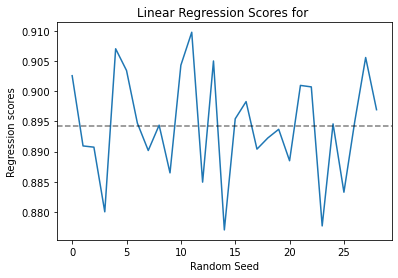

In [209]:
seeds=range(1,30)
scores=[]
for x in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=x)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))    
plt.plot(scores)
plt.ylabel('Regression scores')
plt.axhline(np.array(scores).mean(),c='k',ls='--',alpha=0.5)
plt.xlabel('Random Seed')
plt.title('Linear Regression Scores for ')
plt.show()